# Sentiment Analysis on Movie Reviews 




## Import Libraries

In [1]:
from keras.layers import Activation, Input, Dropout
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords

Using TensorFlow backend.


In [2]:
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('punkt')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Cleaning

In [0]:
reviews = []
tags = []
for fileid in movie_reviews.fileids():
    tag, filename = fileid.split('/')
    reviews.append(movie_reviews.raw(fileid))
    tags.append(tag)

In [4]:
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [5]:
neg = []
pos = []
data = []
label = []
vocab = {}
raw_data = []
stop_words = stopwords.words("english")
stop_words.append(",")
stop_words.append(".")
stop_words.append(":")
stop_words.append('"')
stop_words.append("'")
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    raw_data.append(movie_reviews.raw(fileid))
    temp = []
    for word in words:
      if word not in stop_words:
        temp.append(word)
        vocab[word] =+ vocab.get(word,0) + 1 
    words = temp[:]
    neg.append(words)
    data.append(words)
    label.append('neg')
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    temp = []
    for word in words:
      if word not in stop_words:
        temp.append(word)
        vocab[word] =+ vocab.get(word,0) + 1 
    words = temp[:]
    pos.append(words)
    data.append(words)
    label.append('pos')
# print(vocab['o'])
keys = list(vocab.keys())
cnt = 0
for key in keys:
  # if(vocab[key]<5):
  #   del vocab[key]
  # else:
  vocab[key] = cnt
  cnt+=1
print(len(pos))
print(len(neg))

1000
1000


In every deep learning task, we need to divide our dataset into train and test categories. The train category is used to train the model, and the test one is used to evaluate the trained model. The proportion of train and test dataset does not have any specific formula, and it is up to you, but you should consider the majority of the dataset as the train one.

In [7]:
  '''
    Split the documents into train and test datasets
  '''
document = {'train': [], 'test': []} 
labels = {'train': [], 'test': []}

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=40,shuffle=True)
document['train']=x_train
document['test']=x_test
labels['train']=y_train
labels['test']=y_test

print(x_train[0])


['*', '*', '*', 'following', 'review', 'contains', 'harsh', 'language', 'expect', 'clicked', 'title', '?', '*', '*', '*', 'cast', 'kristen', 'holly', 'smith', 'danica', 'sheridan', 'alex', 'boling', 'michael', 'dotson', 'sonya', 'hensley', 'janet', 'krajeski', 'sabrina', 'lu', 'dionysius', 'burbano', 'calvin', 'grant', 'jeff', 'b', 'harmon', 'written', 'directed', 'jeff', 'b', 'harmon', 'running', 'time', '97', 'minutes', 'thought', 'losing', 'makes', 'vomity', 'inside', '---', 'blatz', 'balinski', '(', 'danica', 'sheridan', ')', 'laments', 'fact', 'lesbian', 'lover', 'april', '(', 'kristen', 'holly', 'smith', ')', 'received', 'telegram', 'ex', '-', 'fiance', 'isle', 'lesbos', 'incredibly', 'offensive', 'musical', 'comedy', 'april', 'pfferpot', '(', 'smith', ')', 'resident', 'small', 'town', 'bumfuck', 'arkansas', 'get', 'married', 'high', 'school', 'sweetheart', 'football', 'hero', 'dick', 'dickson', '(', 'michael', 'dotson', ')', 'april', 'gets', 'extreme', 'cold', 'feet', 'runs', 'h

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



### Encoding the text data 

To feed the text data into a deep model, we must convert the strings to numerical data. A variety of approaches are available for this purpose, and we use two of them for this task: **One-Hot** and **TF-IDF** encodings 

### One-Hot encoding

one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0). So, in our case, we should convert each word to an array in which only one cell in the whole array must be 1, the one which represents that specific word. Then, to represent a document as a vector, we should sum all the words' vectors in the document.

In [9]:
'''
     Encode documents to One-Hot representation.
'''
xs = {'train': [], 'test': []} # Put the document vectors here
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
print(len(vocab))
lenght = len(vocab)
keys = vocab.keys()
print(len(keys))
for sentence in x_train:
  vector = [0]*(lenght+1)
  for word in sentence:
    vector[vocab[word]] = 1
  xs['train'].append(vector)
print("WTF1")
for sentence in x_test:
  vector = [0]*(lenght+1)
  for word in sentence:
    try:
      vector[vocab[word]] = 1
    except Exception:
      vector[0] = 1
  xs['test'].append(vector)
xs['train'] = np.array(xs['train'])
xs['test'] = np.array(xs['test'])



39612
39612
WTF1


In [10]:
print(xs['train'][0])

[0 1 0 ... 0 0 0]


As we studied in the TA class, for classification tasks we need to convert the labels into the one-hot format.

In [11]:
'''
     Convert labels into One-Hot representation.
'''
ys = {'train': [], 'test': []}
for label in labels['train']:
  if label == 'neg': 
    ys['train'].append([0,1])
  else:
    ys['train'].append([1,0])

for label in labels['test']:
  if label == 'neg': 
    ys['test'].append([0,1])
  else:
    ys['test'].append([1,0])
ys['train'] = np.array(ys['train'])
ys['test'] = np.array(ys['test'])
print(ys['train'].shape)
print(xs['train'].shape)
print(ys['test'].shape)
print(xs['test'].shape)

(1340, 2)
(1340, 39613)
(660, 2)
(660, 39613)


Now we build and train the model, and then visualize the results.

In [0]:
def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

def create_model(nb_classes, input_shape):
    """Create a MLP model."""
    input_ = Input(shape=input_shape)
    x = input_
    x = Dense(16, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(nb_classes)(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=input_, outputs=x)
    return model



In [18]:
data = {'x_train': np.array(xs['train']), 'y_train': np.array(ys['train']),
        'x_test': np.array(xs['test']), 'y_test': np.array(ys['test'])}
model = create_model(2, (len(data['x_train'][0]), ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

Train on 1340 samples, validate on 660 samples
Epoch 1/20
1340/1340 [==============================] - 1s 965us/step - loss: 0.6117 - acc: 0.6687 - f1: 0.6462 - recall: 0.6440 - precision: 0.6740 - val_loss: 0.5125 - val_acc: 0.7879 - val_f1: 0.7898 - val_recall: 0.7985 - val_precision: 0.7820
Epoch 2/20
1340/1340 [==============================] - 1s 699us/step - loss: 0.1885 - acc: 0.9660 - f1: 0.9648 - recall: 0.9515 - precision: 0.9802 - val_loss: 0.3863 - val_acc: 0.8402 - val_f1: 0.8443 - val_recall: 0.8652 - val_precision: 0.8249
Epoch 3/20
1340/1340 [==============================] - 1s 684us/step - loss: 0.0288 - acc: 0.9974 - f1: 0.9974 - recall: 0.9970 - precision: 0.9978 - val_loss: 0.3819 - val_acc: 0.8379 - val_f1: 0.8402 - val_recall: 0.8515 - val_precision: 0.8294
Epoch 4/20
1340/1340 [==============================] - 1s 695us/step - loss: 0.0084 - acc: 1.0000 - f1: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.3917 - val_acc: 0.8379 - val_f1: 0.8386 - val_

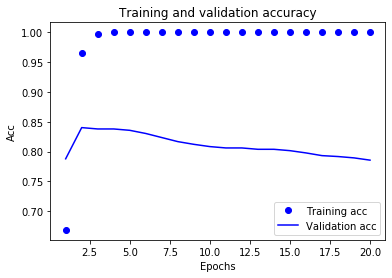

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### TF-IDF encoding

TFIDF, short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus[[1]](http://i.stanford.edu/~ullman/mmds/ch1.pdf). TF-IDF considers both frequencies of a word in the document and Inverse Document Frequency which determines whether a word is common in documents or not. You can learn more about this approach [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to implement it. Note that you need to provide a vector for each document with the same shape as the One-Hot vector but with different values.

In [20]:
'''
     Encode documents to TF-IDF representation.
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

xs_senteces_train = [" ".join(word_list) for word_list in x_train]
xs_senteces_test = [" ".join(word_list) for word_list in x_test]

data = np.array(xs_senteces_train+xs_senteces_test)

t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(data)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(data, mode='tfidf')
print(encoded_docs)
vectorizer = TfidfVectorizer()
countVectorizer = CountVectorizer()

print(data.shape)
x = vectorizer.fit(data)
wx = countVectorizer.fit(data)
xs = {'train': t.texts_to_matrix(xs_senteces_train, mode='tfidf'), 'test': t.texts_to_matrix(xs_senteces_test, mode='tfidf')} # Put the document vectors here


OrderedDict([('following', 180), ('review', 295), ('contains', 117), ('harsh', 37), ('language', 125), ('expect', 216), ('clicked', 2), ('title', 297), ('cast', 769), ('kristen', 11), ('holly', 20), ('smith', 236), ('danica', 3), ('sheridan', 9), ('alex', 80), ('boling', 2), ('michael', 417), ('dotson', 2), ('sonya', 7), ('hensley', 1), ('janet', 22), ('krajeski', 2), ('sabrina', 5), ('lu', 2), ('dionysius', 1), ('burbano', 1), ('calvin', 8), ('grant', 81), ('jeff', 102), ('b', 179), ('harmon', 9), ('written', 409), ('directed', 326), ('running', 323), ('time', 2411), ('97', 18), ('minutes', 644), ('thought', 413), ('losing', 55), ('makes', 992), ('vomity', 1), ('inside', 157), ('blatz', 2), ('balinski', 1), ('laments', 5), ('fact', 805), ('lesbian', 31), ('lover', 94), ('april', 21), ('received', 43), ('telegram', 4), ('ex', 165), ('fiance', 19), ('isle', 7), ('lesbos', 7), ('incredibly', 124), ('offensive', 75), ('musical', 155), ('comedy', 840), ('pfferpot', 3), ('resident', 8), ('s

Now we train and visualize our model again. Note that the result may vary concerning the preprocessing you do or the tokenizer you use to split your data.

In [21]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

Train on 1340 samples, validate on 660 samples
Epoch 1/20
1340/1340 [==============================] - 1s 984us/step - loss: 0.6173 - acc: 0.6381 - f1: 0.5695 - recall: 0.4978 - precision: 0.6803 - val_loss: 0.4886 - val_acc: 0.7803 - val_f1: 0.7810 - val_recall: 0.7833 - val_precision: 0.7800
Epoch 2/20
1340/1340 [==============================] - 1s 704us/step - loss: 0.1774 - acc: 0.9586 - f1: 0.9579 - recall: 0.9500 - precision: 0.9667 - val_loss: 0.3723 - val_acc: 0.8303 - val_f1: 0.8316 - val_recall: 0.8379 - val_precision: 0.8258
Epoch 3/20
1340/1340 [==============================] - 1s 692us/step - loss: 0.0240 - acc: 0.9974 - f1: 0.9974 - recall: 0.9970 - precision: 0.9978 - val_loss: 0.3752 - val_acc: 0.8303 - val_f1: 0.8310 - val_recall: 0.8364 - val_precision: 0.8261
Epoch 4/20
1340/1340 [==============================] - 1s 683us/step - loss: 0.0071 - acc: 1.0000 - f1: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.3943 - val_acc: 0.8356 - val_f1: 0.8347 - val_

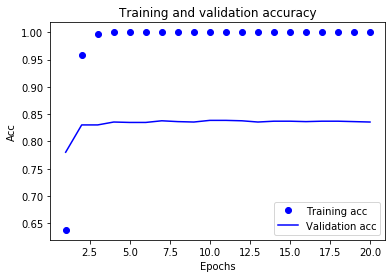

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## Sentiment Analysis on IMDB

Working with this dataset is a bit tricky. download the dataset from [here](https://ai.stanford.edu/~amaas/data/sentiment/), then use the Training set as your whole dataset. You can use a sample of 12500 reviews if you faced any ram problems, but remember to include both negative and positive reviews equally.

In [23]:
 '''
    Import necessary modules, download and prepare the requested dataset
  '''
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xvzf aclImdb_v1.tar.gz 


Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/4

In [24]:
 '''
    Split the documents into train and test datasets
  '''
import os
neg = []
pos = []
for filename in os.listdir(os.getcwd()+"/aclImdb/train/pos"):
  a = open(os.getcwd()+"/aclImdb/train/pos/"+filename).read()
  pos.append(a)
for filename in os.listdir(os.getcwd()+"/aclImdb/train/neg"):
  a = open(os.getcwd()+"/aclImdb/train/neg/"+filename).read()
  neg.append(a)
print(len(neg))
print(len(pos))
pos = pos[:6000]
neg = neg[:6000]
all_data = pos+neg
all_labels = [[0,1]]*6000 + [[1,0]]*6000
x_train, x_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.33, random_state=40,shuffle=True)

document = {'train': [], 'test': []} # Put the documents here
labels = {'train': [], 'test': []} # Put the labels here
document['train']=x_train
document['test']=x_test
labels['train']=y_train
labels['test']=y_test

print(x_train[0])
print(y_train[0])


12500
12500
If Ashanti had been a serious attempt at a film about the institution of slavery, still prevalent in third world countries the film might have been better received. Instead it turns into a star studded disaster of a movie where the stars came in, said their lines, and picked up their paychecks without much conviction.<br /><br />Michael Caine and his wife Beverly Johnson work for the United Nations World Health Organization and are busy doing their humanitarian thing in East Africa. Along comes Peter Ustinov who can barely summon enough ham in him to make a go of the part as a Moslem slave dealer. As Johnson is black he grabs her anyway along with a lot of children and a few adults as well.<br /><br />Of course Caine doesn't take kindly to the kidnapping and the rest of the film is spent in a rescue attempt. The rest of the cast has such folks as William Holden, Rex Harrison, Omar Sharif and Indian film star Kebir Bedi in parts and looking so incredibly bored with the whole

Now you train the dense model on this dataset. Use one of the encoding approaches you used for the prior dataset and then feed the preprocessed data into the model. 

In [0]:
'''
     Encode documents to a vector representation.
'''
xs = {'train': [], 'test': []} # Put the document vectors here
ys = {'train':  np.array(y_train), 'test':  np.array(y_test)} # Put the label vectors here

from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(all_data)
xs['train'] = np.array(t.texts_to_matrix(x_train, mode='tfidf'))
xs['test'] = np.array(t.texts_to_matrix(x_test, mode='tfidf'))

In [26]:
print(len(xs['train'][0]))
print(len(xs['test'][0]))
print(ys['train'].shape)
print(ys['test'].shape)

63436
63436
(8040, 2)
(3960, 2)


In [27]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

Train on 8040 samples, validate on 3960 samples
Epoch 1/20
8040/8040 [==============================] - 9s 1ms/step - loss: 0.3940 - acc: 0.8289 - f1: 0.8264 - recall: 0.8289 - precision: 0.8266 - val_loss: 0.3292 - val_acc: 0.8658 - val_f1: 0.8673 - val_recall: 0.8758 - val_precision: 0.8594
Epoch 2/20
8040/8040 [==============================] - 9s 1ms/step - loss: 0.0542 - acc: 0.9838 - f1: 0.9838 - recall: 0.9853 - precision: 0.9824 - val_loss: 0.4367 - val_acc: 0.8660 - val_f1: 0.8651 - val_recall: 0.8604 - val_precision: 0.8702
Epoch 3/20
8040/8040 [==============================] - 9s 1ms/step - loss: 0.0074 - acc: 0.9988 - f1: 0.9988 - recall: 0.9989 - precision: 0.9986 - val_loss: 0.5040 - val_acc: 0.8658 - val_f1: 0.8653 - val_recall: 0.8629 - val_precision: 0.8680
Epoch 4/20
8040/8040 [==============================] - 9s 1ms/step - loss: 0.0017 - acc: 0.9999 - f1: 0.9999 - recall: 0.9999 - precision: 0.9999 - val_loss: 0.5501 - val_acc: 0.8673 - val_f1: 0.8668 - val_recall:

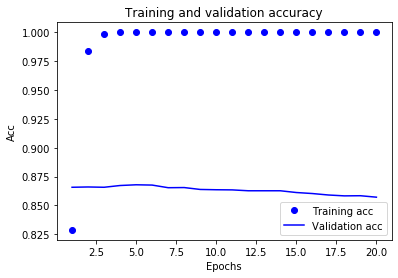

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### Word Embeddings
In this section, we want to use a pre-trained word embedding to encode the reviews. To do so, we leverage the Google News Word2Vec model, a model that provides 300 semantic features for each word. These features are extracted concerning the position of the training word and by considering adjacent words in the training data (Google News). More detailed information will be discussed in your class later.

You can download the pre-trained model from [here](https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz), and you may want to use [gensim](https://radimrehurek.com/gensim/) to load the file. Next, you need to replace the document vector with the average of word vectors that are available in the W2V model. Use a weighted average to consider the frequency of a word as well as its presence.

In [29]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip GoogleNews-vectors-negative300.bin.gz
!ls


--2020-03-08 10:08:32--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.9.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.9.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  81.8MB/s    in 18s     

2020-03-08 10:08:51 (86.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

aclImdb  aclImdb_v1.tar.gz  GoogleNews-vectors-negative300.bin	sample_data


In [30]:

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

'''
     Encode documents to a vector representation.
'''
xs = {'train': [], 'test': []}
ys = {'train': [], 'test': []}

for sentence in x_train:
    words_vector = np.zeros((300,))
    cnt = 0
    for word in sentence.split():
      try:
        words_vector += model.wv.get_vector(word)
        cnt +=1
      except:
        continue
    xs['train'].append(words_vector/cnt)

for sentence in x_test:
  words_vector = np.zeros((300,))
  cnt = 0
  for word in sentence.split():
      try:
        words_vector += model.wv.get_vector(word)
        cnt += 1
      except:
        continue
        
  xs['test'].append(words_vector/cnt)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [31]:

xs['train'] = np.array(xs['train'])
xs['test'] = np.array(xs['test'])
ys['train'] = np.array(y_train)
ys['test'] = np.array(y_test)
print(xs['train'].shape)
print(ys['train'].shape)


(8040, 300)
(8040, 2)


In [32]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

Train on 8040 samples, validate on 3960 samples
Epoch 1/20
8040/8040 [==============================] - 1s 128us/step - loss: 0.6585 - acc: 0.6201 - f1: 0.6424 - recall: 0.6872 - precision: 0.6081 - val_loss: 0.5852 - val_acc: 0.7582 - val_f1: 0.7671 - val_recall: 0.7955 - val_precision: 0.7414
Epoch 2/20
8040/8040 [==============================] - 0s 58us/step - loss: 0.5033 - acc: 0.7840 - f1: 0.7860 - recall: 0.7935 - precision: 0.7790 - val_loss: 0.4553 - val_acc: 0.7991 - val_f1: 0.7997 - val_recall: 0.8013 - val_precision: 0.7982
Epoch 3/20
8040/8040 [==============================] - 0s 57us/step - loss: 0.4377 - acc: 0.8029 - f1: 0.8031 - recall: 0.8041 - precision: 0.8022 - val_loss: 0.4550 - val_acc: 0.7788 - val_f1: 0.7785 - val_recall: 0.7778 - val_precision: 0.7793
Epoch 4/20
8040/8040 [==============================] - 0s 59us/step - loss: 0.4170 - acc: 0.8128 - f1: 0.8127 - recall: 0.8124 - precision: 0.8131 - val_loss: 0.4130 - val_acc: 0.8106 - val_f1: 0.8105 - val_re

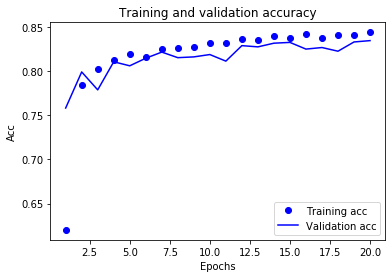

In [33]:
history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()